# Bitcoin Blockchain Bloat

Bitcoin is based on a blockchain that grows with every transaction that is made. At the time I write this (2017-07-15), the blockchain's size is ~120 GB - a considerable size compared to my SSD (500 GB) and a massive size for a download. And it grows quickly.

The idea behind bitcoin is to create a decentralized currency, which means that every bitcoiner has a copy of the full blockchain. Given the size and growth of the blockchain, will that remain feasible?

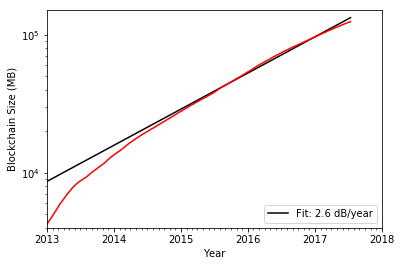

In [28]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
import statsmodels.formula.api as sm
import numpy as np

data = pd.read_csv('https://api.blockchain.info/charts/blocks-size?format=csv&timespan=all', names=['Date', 'Size'], index_col=0)
data['Date'] = pd.to_datetime(data.index)
data['date_delta'] = (data['Date'] - data['Date'].min())  \
                        / np.timedelta64(1,'Y')

fit = sm.ols('np.log10(Size) ~ date_delta', data=data.loc['2015':]).fit()
q, m = fit.params

pl.close('all')

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = pl.subplots(1, 1)

ax.semilogy(data['Date'], 10**(q + m * data['date_delta']), 'k-',
            label='Fit: {0:.1f} dB/year'.format(10 * m))
ax.semilogy(data['Date'], data['Size'], 'r-', label='__nolabel__')

pl.legend(loc=4)

ax.set_xlabel('Year')
ax.set_ylabel('Blockchain Size (MB)')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

ax.set_xlim(['2013', '2018'])
ax.set_ylim([4000, 150000]);

The blockchain seems to grow exponentially with 2.6 dB/year (~factor of 1.8 per year). What about hard drives?

![IBM Roadmap](http://www.deepspar.com/images/IBM_HDD_Roarmap.jpg)


IBM's roadmap indicates about a factor of 200 in 12 years, i.e., 1.9 dB/year or a factor of 1.5 to 1.6/year. In other words, the situation will not improve over time, it will grow worse.

## Conclusion

If these extrapolations hold, it will become impossible for every bitcoiner to have a full blockchain. To solve this, the blockchain growth must slow considerably). Alternatively, many bitcoiners may share a blockchain.

May the latter give rise to a new form of banks?